In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
train_data = pd.read_csv("C:\\Data science\\Assignments\\Titanic_train.csv")
test_data = pd.read_csv("C:\\Data science\\Assignments\\Titanic_test.csv")

In [3]:
# Data Exploration
print("First few rows of the dataset:")
print(train_data.head())

First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

In [10]:
print("\nSummary of the dataset:")
print(train_data.describe())


Summary of the dataset:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [12]:
print("\nData types and missing values:")
print(train_data.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [14]:
# Data Preprocessing
# Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

C:\Users\jeeshan\AppData\Local\Temp\ipykernel_9640\1344952398.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\jeeshan\AppData\Local\Temp\ipykernel_9640\1344952398.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [16]:
# Drop the 'Cabin' column
train_data.drop(columns=['Cabin'], inplace=True)

In [18]:
# Encode categorical variables
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])

In [20]:
# Drop unnecessary columns
train_data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [22]:
# Split the data into features and target variable
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [24]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Model Building
# Build and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [28]:
# Model Evaluation
# Predict on the validation set
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

In [30]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1-Score: 0.76
ROC-AUC Score: 0.88


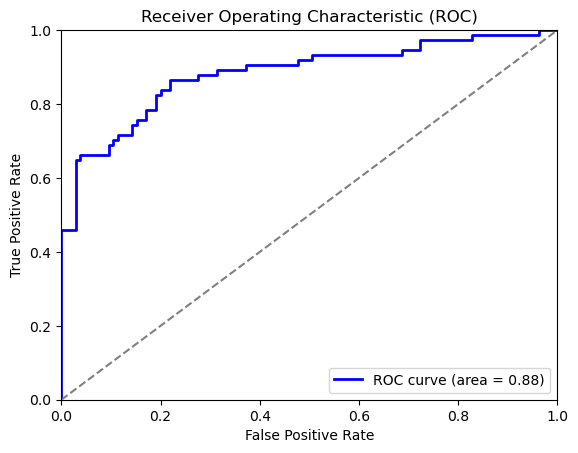

In [32]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [34]:
# Interpretation
print("Coefficients of the model:")
print(pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]}))

Coefficients of the model:
    Feature  Coefficient
0    Pclass    -0.930680
1       Sex    -2.596995
2       Age    -0.030433
3     SibSp    -0.293906
4     Parch    -0.111852
5      Fare     0.002534
6  Embarked    -0.218777


In [ ]:
# Interview Questions and Answers

# 1. What is the difference between precision and recall?
answer_1 = """
**Precision** is the ratio of correctly predicted positive observations to the total predicted positives. 
It answers the question: "Of all the passengers that were predicted to survive, how many actually survived?"

**Recall** is the ratio of correctly predicted positive observations to all observations in the actual class. 
It answers the question: "Of all the passengers that actually survived, how many were predicted to survive?"
"""

# Displaying the answer
print("1. What is the difference between precision and recall?")
print(answer_1)

# 2. What is cross-validation, and why is it important in binary classification?
answer_2 = """
**Cross-validation** is a technique for assessing how a model generalizes to an independent dataset. 
It involves partitioning the data into complementary subsets, training the model on one subset, and validating it on another.

**Importance**: Cross-validation is important because it helps ensure that the model's performance is not dependent on a specific division 
of the data into training and testing sets. It provides a more reliable estimate of the model's performance, especially in binary classification.
"""

# Displaying the answer
print("\n2. What is cross-validation, and why is it important in binary classification?")
print(answer_2)
